In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_theme()

In [2]:
#The subject of the project is:
#Market Crash Detectives: Finding Warning Signs Before a Stock Market Crash
#What will I Do:
#Analyze historical stock crashes (2008, COVID-19, Dot-Com, etc.).
#Identify early warning signals like high volatility, falling corporate earnings, or rising debt levels.
#Find out if the current market shows similar warning signs.

In [3]:
# S&P 500 Historical Data
SP_500=pd.read_csv(r"C:\Users\eronk\OneDrive\Desktop\data analyst\project 3\SPX - Copy.csv")

In [4]:
SP_500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [5]:
#Checking the data in general:
SP_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23323 non-null  object 
 1   Open       23323 non-null  float64
 2   High       23323 non-null  float64
 3   Low        23323 non-null  float64
 4   Close      23323 non-null  float64
 5   Adj Close  23323 non-null  float64
 6   Volume     23323 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
#The format of the date in the file is object. Now we will convert it to a standard date
SP_500['Date'] = pd.to_datetime(SP_500['Date'])

In [7]:
SP_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23323 non-null  datetime64[ns]
 1   Open       23323 non-null  float64       
 2   High       23323 non-null  float64       
 3   Low        23323 non-null  float64       
 4   Close      23323 non-null  float64       
 5   Adj Close  23323 non-null  float64       
 6   Volume     23323 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 MB


In [8]:
#Now I will delete columns that I do not need. What interests me in the research is only the closing rate
SP_500.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [9]:
SP_500.head()

,Date,Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


In [10]:
#Rename column to be easier to understand:
SP_500=SP_500.rename(columns={"Close":"S&P Close"})

In [11]:
SP_500.head()

,Date,S&P Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


In [12]:
# VIX Historical Data
#(VIX) is a real-time index that represents the market’s expectations for the relative strength of near-term price changes of the S&P 500 Index.
VIX=pd.read_csv(r"C:\Users\eronk\OneDrive\Desktop\data analyst\project 3\VIX_History.csv")

In [13]:
VIX.head()

,Date,OPEN,HIGH,LOW,VIX CLOSE
0,1/2/1990,17.24,17.24,17.24,17.24
1,1/3/1990,18.19,18.19,18.19,18.19
2,1/4/1990,19.22,19.22,19.22,19.22
3,1/5/1990,20.11,20.11,20.11,20.11
4,1/8/1990,20.26,20.26,20.26,20.26


In [14]:
#Checking the data in general:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8864 entries, 0 to 8863
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8864 non-null   object 
 1   OPEN       8864 non-null   float64
 2   HIGH       8864 non-null   float64
 3   LOW        8864 non-null   float64
 4   VIX CLOSE  8864 non-null   float64
dtypes: float64(4), object(1)
memory usage: 346.4+ KB


In [15]:
#The format of the date in the file is object. Now we will convert it to a standard date
VIX['Date'] = pd.to_datetime(VIX['Date'])

In [16]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8864 entries, 0 to 8863
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8864 non-null   datetime64[ns]
 1   OPEN       8864 non-null   float64       
 2   HIGH       8864 non-null   float64       
 3   LOW        8864 non-null   float64       
 4   VIX CLOSE  8864 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 346.4 KB


In [17]:
#Now I will delete columns that I do not need. What interests me in the research is only the closing rate
VIX.drop(['OPEN','HIGH','LOW'],axis=1,inplace=True)

In [ ]:
#Early warning signs:
#If VIX spikes above 30, market is entering panic mode.
#If VIX exceeds 50, expect a major market crash.- 
#Common pattern: Before a major crash, the stock market reaches all-time highs, followed by a sharp correction.

In [29]:
VIX.describe()

,Date,VIX CLOSE
count,8864,8864.000000
mean,2007-08-02 09:10:23.826714880,19.453956
min,1990-01-02 00:00:00,9.140000
25%,1998-10-11 06:00:00,13.840000
50%,2007-08-04 12:00:00,17.600000
75%,2016-05-23 06:00:00,22.790000
max,2025-02-13 00:00:00,82.690000
std,NaN,7.829420


In [19]:
#Now that the data is ready I will merge the data to see them together
SP_500_VIX=pd.merge(SP_500,VIX,on='Date')

In [20]:
SP_500_VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7769 non-null   datetime64[ns]
 1   S&P Close  7769 non-null   float64       
 2   VIX CLOSE  7769 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 182.2 KB


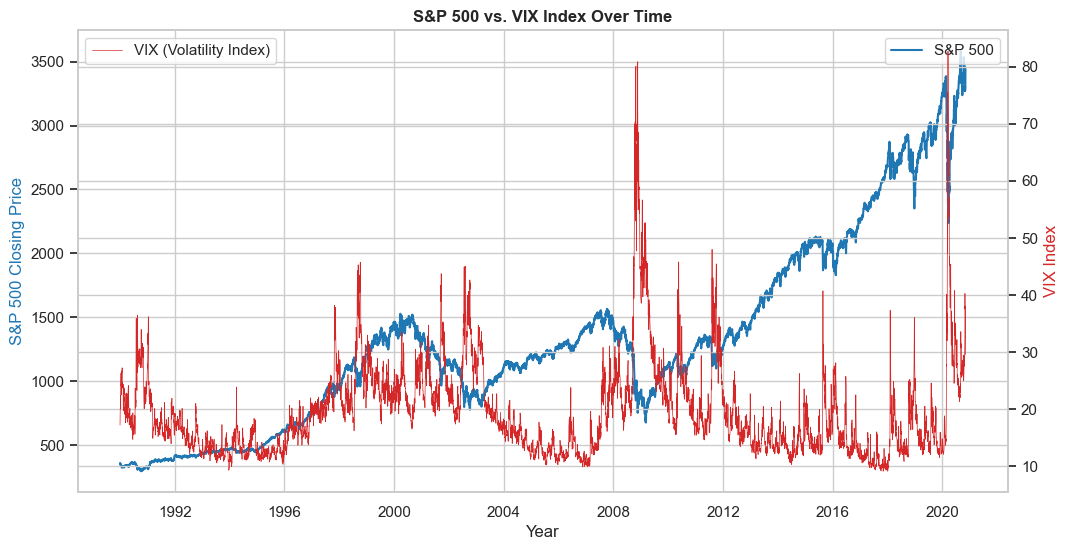

In [67]:
#Let's put the data on a graph so we can see in general how it behaves:
#I had to use two axes because their indices are not on the same scale-
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel("Year")
ax1.set_ylabel("S&P 500 Closing Price", color='#1f77b4')
ax1.plot(SP_500_VIX['Date'], SP_500_VIX['S&P Close'], color='#1f77b4', label="S&P 500")
ax1.legend(loc="upper right") 
ax2 = ax1.twinx()
ax2.set_ylabel("VIX Index", color='#d62728')
ax2.plot(SP_500_VIX['Date'], SP_500_VIX['VIX CLOSE'], color='#d62728',linewidth=0.5, label="VIX (Volatility Index)")
plt.title("S&P 500 vs. VIX Index Over Time",fontweight='bold')
plt.legend()
plt.show()


In [23]:
#The graph comparing the VIX (Volatility Index) and S&P 500 from 1990 to 2020 clearly shows an inverse relationship
#Now I will check the correlation

In [25]:
SP_500_VIX.corr()

,Date,S&P Close,VIX CLOSE
Date,1.000000,0.894001,-0.003631
S&P Close,0.894001,1.000000,-0.086813
VIX CLOSE,-0.003631,-0.086813,1.000000


In [26]:
#correlation between VIX and S&P 500 from 1990–2020 is -0.0868, this suggests that their relationship is actually very weak over this long-term period.
# This is surprising since we usually expect a stronger inverse correlation.
#Now I will add a daily percentage change for each of the indicators
#By calculating the percentage of daily change (daily returns) for each index (S&P 500 and VIX), I'm capturing day-to-day movements rather than just long-term price trends.

In [27]:
SP_500_VIX['SP500_Daily_Return'] = SP_500_VIX['S&P Close'].pct_change()
SP_500_VIX['VIX_Daily_Return'] = SP_500_VIX['VIX CLOSE'].pct_change()

In [28]:
SP_500_VIX.head()

,Date,S&P Close,VIX CLOSE,SP500_Daily_Return,VIX_Daily_Return
0,1990-01-02,359.690002,17.24,NaN,NaN
1,1990-01-03,358.760010,18.19,-0.002586,0.055104
2,1990-01-04,355.670013,19.22,-0.008613,0.056625
3,1990-01-05,352.200012,20.11,-0.009756,0.046306
4,1990-01-08,353.790009,20.26,0.004514,0.007459


In [30]:
#Analysis demonstrates that daily returns provide a clearer, more accurate view of market volatility and stress,
#emphasizing VIX’s critical role as a short-term predictor of market movements.
SP_500_VIX.corr()

,Date,S&P Close,VIX CLOSE,SP500_Daily_Return,VIX_Daily_Return
Date,1.000000,0.894001,-0.003631,0.001040,0.011244
S&P Close,0.894001,1.000000,-0.086813,0.012481,0.009576
VIX CLOSE,-0.003631,-0.086813,1.000000,-0.122407,0.103736
SP500_Daily_Return,0.001040,0.012481,-0.122407,1.000000,-0.698000
VIX_Daily_Return,0.011244,0.009576,0.103736,-0.698000,1.000000


In [31]:
#Short-Term vs. Long-Term:
#While short-term correlations during crises are strong, the long-term correlation is weaker because most years were relatively calm.
#The spikes in VIX during crises are short-lived compared to stable periods.
#Now I will check the correlation according to the years in which there were economic crises

In [32]:
#Now I will focus on Crisis Periods Instead of Full 30 Years
Dot_com_Bubble=SP_500_VIX.query("Date>='2000-03-10' and Date<='2002-10-01'")

In [33]:
correlation = Dot_com_Bubble[['SP500_Daily_Return', 'VIX_Daily_Return']].corr()
print(correlation)
#If correlation is -0.8 or lower, there’s a strong inverse relationship.
#A strong inverse relationship means VIX can be used as a warning indicator before stock crashes.
#When S&P 500 falls, the VIX rises (market fear).
#When S&P 500 rises, the VIX drops (market stability).

                    SP500_Daily_Return  VIX_Daily_Return
SP500_Daily_Return            1.000000         -0.802865
VIX_Daily_Return             -0.802865          1.000000


In [34]:
#The 2008 financial crisis:
Global_Financial_Crisis=SP_500_VIX.query("Date>='2007-10-01' and Date<='2009-03-01'")

In [35]:
#What this means: The VIX accurately predicted market panic during the 2008 crash
Global_Financial_Crisis.corr()

,Date,S&P Close,VIX CLOSE,SP500_Daily_Return,VIX_Daily_Return
Date,1.000000,-0.922295,0.689453,-0.044267,0.002996
S&P Close,-0.922295,1.000000,-0.875307,0.093992,-0.038271
VIX CLOSE,0.689453,-0.875307,1.000000,-0.131386,0.111313
SP500_Daily_Return,-0.044267,0.093992,-0.131386,1.000000,-0.817074
VIX_Daily_Return,0.002996,-0.038271,0.111313,-0.817074,1.000000


In [36]:
COVID_19_Crash=SP_500_VIX.query("Date>='2020-03-01' and Date<='2023-12-31'")

In [37]:
#The VIX was a strong predictor of the crash but not as extreme as 2008
#COVID-19 was a sudden crash, while 2008 was a slow collapse over time.
COVID_19_Crash.corr()

,Date,S&P Close,VIX CLOSE,SP500_Daily_Return,VIX_Daily_Return
Date,1.000000,0.884677,-0.640409,0.011048,-0.010471
S&P Close,0.884677,1.000000,-0.836603,0.109207,-0.040432
VIX CLOSE,-0.640409,-0.836603,1.000000,-0.209941,0.197248
SP500_Daily_Return,0.011048,0.109207,-0.209941,1.000000,-0.747429
VIX_Daily_Return,-0.010471,-0.040432,0.197248,-0.747429,1.000000


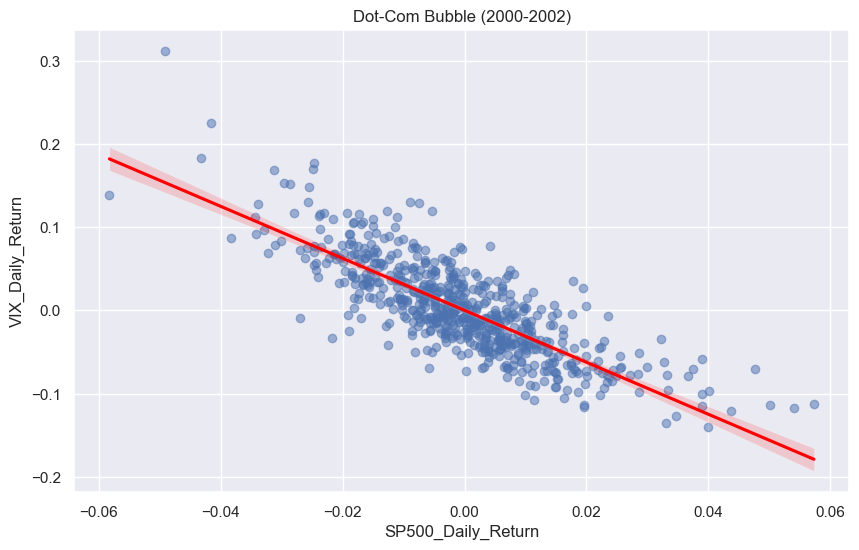

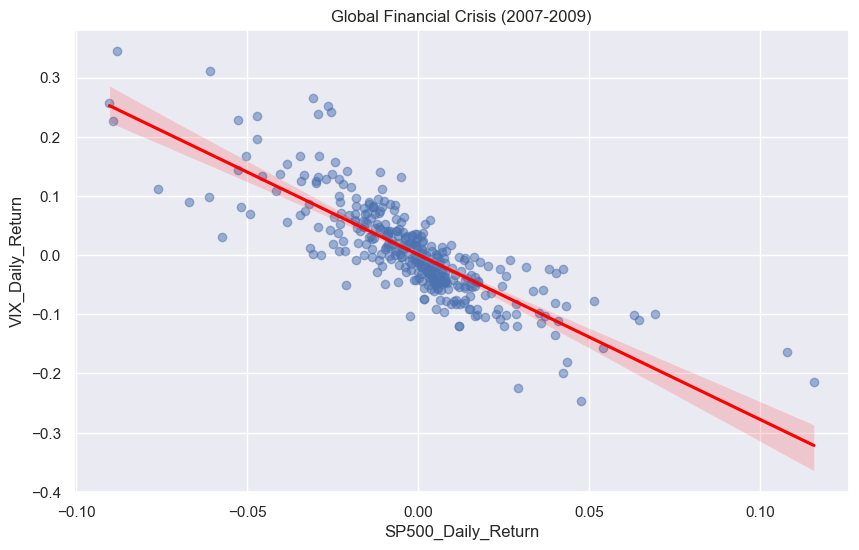

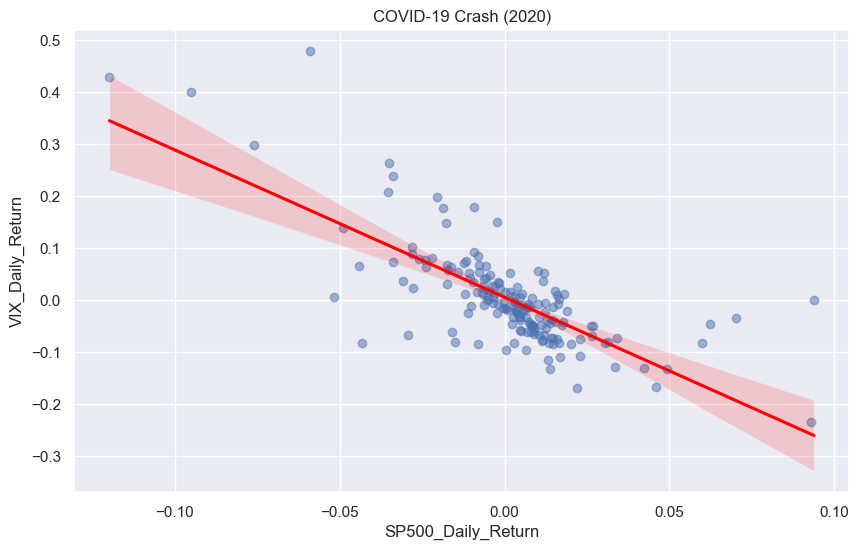

In [38]:
#Now we will see the correlations on a graph:
def plot_correlation(SP_500_VIX, start_date, end_date, title):
    period_data = SP_500_VIX[(SP_500_VIX["Date"] >= start_date) & (SP_500_VIX["Date"] <= end_date)]
    plt.figure(figsize=(10, 6))
    sb.regplot(x=period_data["SP500_Daily_Return"], 
                y=period_data["VIX_Daily_Return"], 
                scatter_kws={'alpha':0.5}, 
                line_kws={"color": "red"})
    plt.xlabel("SP500_Daily_Return")
    plt.ylabel("VIX_Daily_Return")
    plt.title(title)
    plt.grid(True)
    plt.show()
plot_correlation(SP_500_VIX, "2000-03-01", "2002-10-01", "Dot-Com Bubble (2000-2002)")
plot_correlation(SP_500_VIX, "2007-10-01", "2009-03-01", "Global Financial Crisis (2007-2009)")
plot_correlation(SP_500_VIX, "2020-03-01", "2023-12-31", "COVID-19 Crash (2020)")


In [39]:
#These scatter plots confirm a strong short-term inverse relationship between daily S&P 500 and VIX returns during major crises.
#While the long-term correlation was weak, daily changes clearly show that when markets fall significantly, volatility spikes sharply,
#Making VIX an essential indicator for forecasting short-term market stress.

In [40]:
#Now I will analyze how inflation affects the stock market:
inflation_rates=pd.read_csv(r"C:\Users\eronk\OneDrive\Desktop\data analyst\project 3\FEDFUNDS.csv")

In [41]:
inflation_rates.head()

,observation_date,FEDFUNDS
0,7/1/1954,0.80
1,8/1/1954,1.22
2,9/1/1954,1.07
3,10/1/1954,0.85
4,11/1/1954,0.83


In [42]:
inflation_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  799 non-null    object 
 1   FEDFUNDS          799 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.6+ KB


In [43]:
#The format of the date in the file is object. Now we will convert it to a standard date
inflation_rates['observation_date'] = pd.to_datetime(inflation_rates['observation_date'])

In [44]:
inflation_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  799 non-null    datetime64[ns]
 1   FEDFUNDS          799 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.6 KB


In [45]:
#Now I will change the title of the date to match the title in the s&p500 index
inflation_rates=inflation_rates.rename(columns={"observation_date":"Date"})

In [46]:
inflation_rates

,Date,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
794,2020-09-01,0.09
795,2020-10-01,0.09
796,2020-11-01,0.09
797,2020-12-01,0.09


In [47]:
#Inflation data is typically released monthly, while S&P 500 is daily.
#To combine these datasets, all data must have the same frequency (daily).
inflation_rates = inflation_rates.set_index("Date").resample("D").ffill().reset_index()

In [48]:
inflation_rates

,Date,FEDFUNDS
0,1954-07-01,0.80
1,1954-07-02,0.80
2,1954-07-03,0.80
3,1954-07-04,0.80
4,1954-07-05,0.80
...,...,...
24287,2020-12-28,0.09
24288,2020-12-29,0.09
24289,2020-12-30,0.09
24290,2020-12-31,0.09


In [49]:
SP_500

,Date,S&P Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000
...,...,...
23318,2020-10-29,3310.110107
23319,2020-10-30,3269.959961
23320,2020-11-02,3310.239990
23321,2020-11-03,3369.159912


In [50]:
#Now I merge the tables together with a key linking the two tables:
SP_500_inflation=pd.merge(SP_500,inflation_rates,on='Date',how='inner')

In [51]:
SP_500_inflation

,Date,S&P Close,FEDFUNDS
0,1954-07-01,29.209999,0.80
1,1954-07-02,29.590000,0.80
2,1954-07-06,29.920000,0.80
3,1954-07-07,29.940001,0.80
4,1954-07-08,29.940001,0.80
...,...,...,...
16698,2020-10-29,3310.110107,0.09
16699,2020-10-30,3269.959961,0.09
16700,2020-11-02,3310.239990,0.09
16701,2020-11-03,3369.159912,0.09


In [52]:
SP_500_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16703 entries, 0 to 16702
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16703 non-null  datetime64[ns]
 1   S&P Close  16703 non-null  float64       
 2   FEDFUNDS   16703 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 391.6 KB


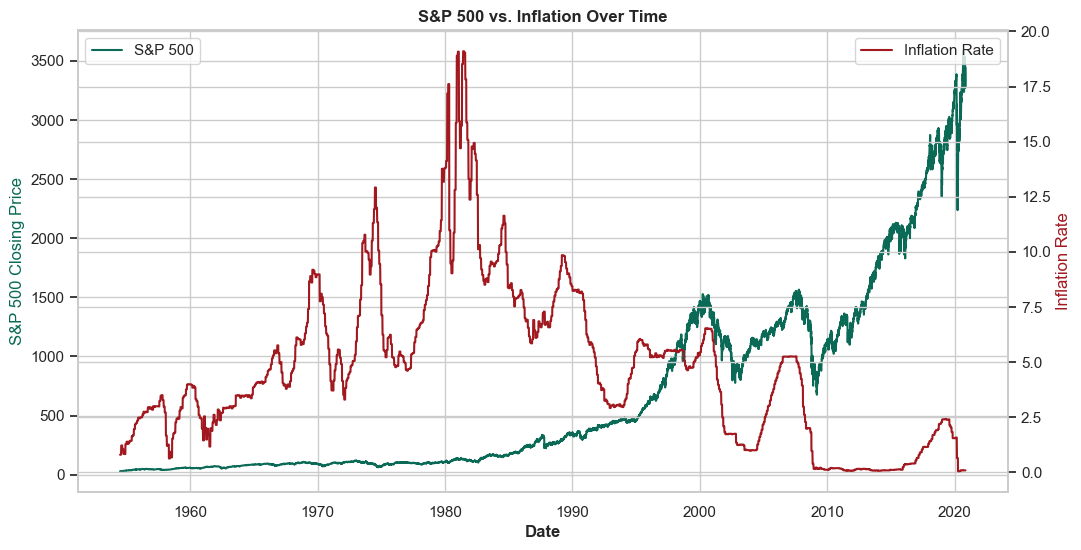

In [71]:
#Line Chart: S&P 500 vs. Inflation Over Time
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel("Date",fontweight='bold')
ax1.set_ylabel("S&P 500 Closing Price", color="#0A6A56")
ax1.plot(SP_500_inflation['Date'], SP_500_inflation['S&P Close'], color="#0A6A56", label="S&P 500")
plt.legend()
ax2 = ax1.twinx()
ax2.set_ylabel("Inflation Rate", color='#A1181F')
ax2.plot(SP_500_inflation['Date'], SP_500_inflation['FEDFUNDS'], color="#A1181F", label="Inflation Rate")
plt.title("S&P 500 vs. Inflation Over Time",fontweight='bold')
plt.legend()
plt.show()


In [54]:
#We can seea moderate negative relationship between inflation and the S&P 500.
#Historically, higher inflation usually led to weaker stock performance, reinforcing that inflation is an important factor for investors to monitor.
#When interest rates increase, borrowing becomes more expensive, slowing business growth → stocks often fall.
#When interest rates decrease, borrowing is cheaper, encouraging investment → stocks rise.
#However, other factors (GDP growth, corporate earnings, inflation, Fed policies, global events) also impact the S&P 500.
SP_500_inflation.corr()

,Date,S&P Close,FEDFUNDS
Date,1.000000,0.864936,-0.315754
S&P Close,0.864936,1.000000,-0.496464
FEDFUNDS,-0.315754,-0.496464,1.000000


In [55]:
#Now I want to see how these three indices together behave in the last three years in order to see the current trends
SP_VIX_FED=pd.read_csv(r"C:\Users\eronk\OneDrive\Desktop\data analyst\project 3\23-25.csv")

In [56]:
SP_VIX_FED.head()

,observation_date,SP500,VIXCLS,FEDFUNDS
0,1/1/2023,3960.66,20.17,4.33
1,2/1/2023,4079.68,20.12,4.57
2,3/1/2023,3968.56,21.64,4.65
3,4/1/2023,4121.47,17.82,4.83
4,5/1/2023,4146.17,17.64,5.06


In [57]:
SP_VIX_FED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  25 non-null     object 
 1   SP500             25 non-null     float64
 2   VIXCLS            25 non-null     float64
 3   FEDFUNDS          25 non-null     float64
dtypes: float64(3), object(1)
memory usage: 932.0+ bytes


In [58]:
#The format of the date in the file is object. Now we will convert it to a standard date
SP_VIX_FED['observation_date'] = pd.to_datetime(SP_VIX_FED['observation_date'])

In [59]:
SP_VIX_FED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  25 non-null     datetime64[ns]
 1   SP500             25 non-null     float64       
 2   VIXCLS            25 non-null     float64       
 3   FEDFUNDS          25 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 932.0 bytes


In [61]:
SP_VIX_FED.head()

,observation_date,SP500,VIXCLS,FEDFUNDS
0,2023-01-01,3960.66,20.17,4.33
1,2023-02-01,4079.68,20.12,4.57
2,2023-03-01,3968.56,21.64,4.65
3,2023-04-01,4121.47,17.82,4.83
4,2023-05-01,4146.17,17.64,5.06


In [64]:
SP_VIX_FED.describe()

,observation_date,SP500,VIXCLS,FEDFUNDS
count,25,25.000000,25.000000,25.000000
mean,2023-12-31 16:19:12,4900.439200,16.198000,5.053600
min,2023-01-01 00:00:00,3960.660000,12.670000,4.330000
25%,2023-07-01 00:00:00,4345.370000,13.980000,4.830000
50%,2024-01-01 00:00:00,4804.490000,15.870000,5.330000
75%,2024-07-01 00:00:00,5478.210000,17.820000,5.330000
max,2025-01-01 00:00:00,6010.910000,21.640000,5.330000
std,NaN,682.170914,2.672357,0.356381


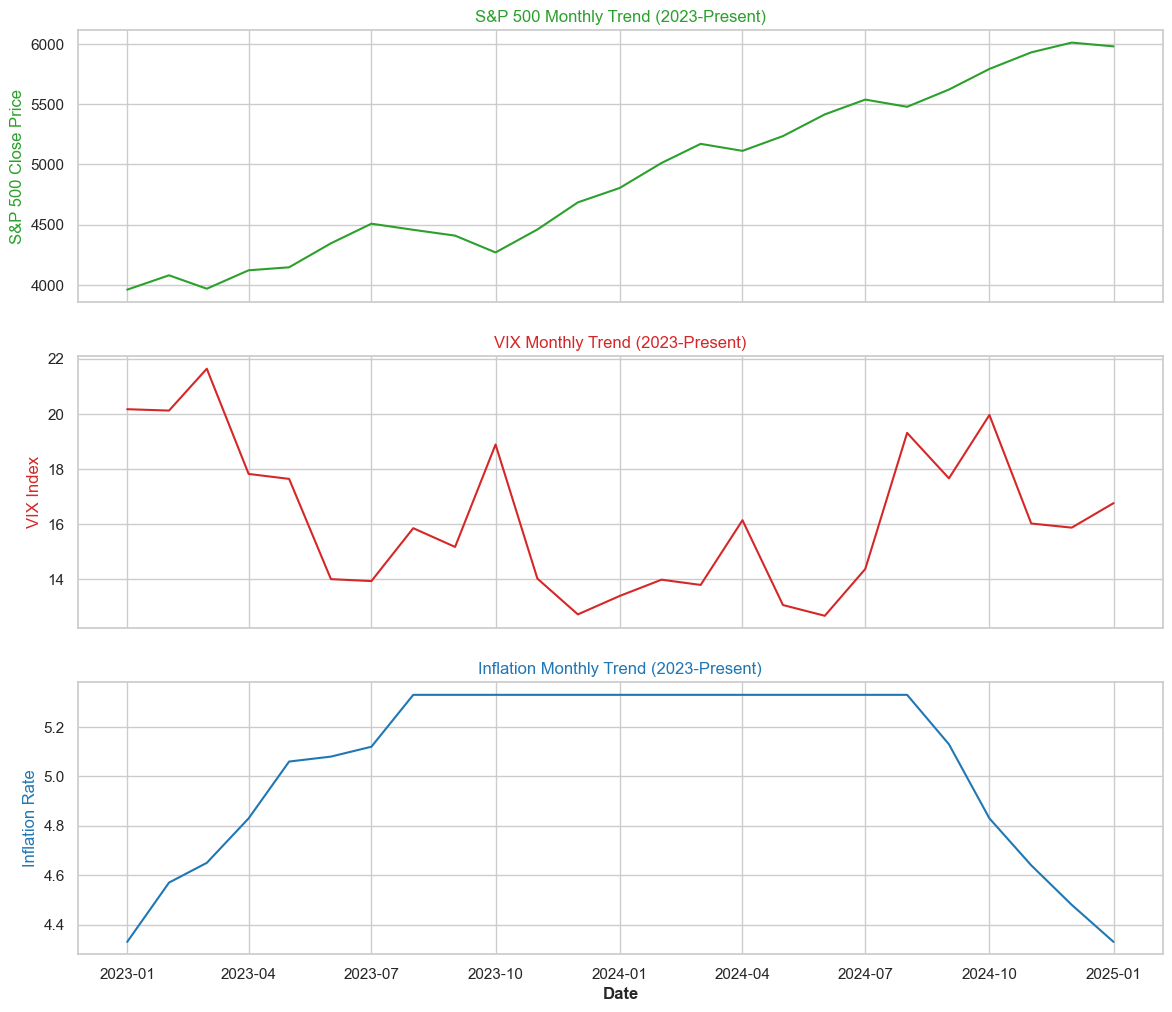

In [72]:
#I want to see each of the indicators in the graph separately:
sb.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)
colors = ["#2ca02c","#d62728","#1f77b4"] 
# Plot S&P 500 Trend
sb.lineplot(ax=axes[0], x=SP_VIX_FED['observation_date'], y=SP_VIX_FED['SP500'],color=colors[0])
axes[0].set_title("S&P 500 Monthly Trend (2023-Present)",color=colors[0])
axes[0].set_ylabel("S&P 500 Close Price",color=colors[0])

# Plot VIX Trend
sb.lineplot(ax=axes[1], x=SP_VIX_FED['observation_date'], y=SP_VIX_FED['VIXCLS'],color=colors[1])
axes[1].set_title("VIX Monthly Trend (2023-Present)",color=colors[1])
axes[1].set_ylabel("VIX Index",color=colors[1])

# Plot Inflation Trend
sb.lineplot(ax=axes[2], x=SP_VIX_FED['observation_date'], y=SP_VIX_FED['FEDFUNDS'],color=colors[2])
axes[2].set_title("Inflation Monthly Trend (2023-Present)",color=colors[2])
axes[2].set_ylabel("Inflation Rate",color=colors[2])
axes[2].set_xlabel("Date",fontweight='bold')
plt.show()

In [66]:
#Project Summary:
#This project examined the relationship between the S&P 500, VIX, and inflation, analyzing historical crises and focusing on 2023–2025 to predict future market trends.
# Key Findings (2023–2025):
# S&P 500 & VIX Maintain an Inverse Correlation → As seen in past downturns, market declines led to VIX spikes, signaling investor fear.
# Inflation Remains a Key Market Driver → Higher-than-expected inflation delayed rate cuts, increasing market uncertainty.
# Market Valuations Are Historically High → Similar to the Dot-Com Bubble, large-cap stocks remain expensive, raising concerns about future corrections.
# Future Market Expectations (Based on Past & Current Data)
# Inflation May Stay Elevated → The Fed is cautious about cutting rates too soon.
# Market Volatility Will Persist → Geopolitical risks and economic shifts could drive further fluctuations.
# S&P 500 Projected Growth → Experts forecast ~10% returns in 2025, but high valuations & inflation pressures pose risks.
# Conclusion:
#The market remains uncertain, with risks tied to inflation, interest rates, and investor sentiment. Monitoring these indicators is crucial for anticipating future movements and navigating volatility. 